In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('./data/titanic.csv')
df.head(5)

,Survived,Pclass,Name,Sex,Age,Siblings/Spouses Aboard,Parents/Children Aboard,Fare
0,0,3,Mr. Owen Harris Braund,male,22.0,1,0,7.2500
1,1,1,Mrs. John Bradley (Florence Briggs Thayer) Cum...,female,38.0,1,0,71.2833
2,1,3,Miss. Laina Heikkinen,female,26.0,0,0,7.9250
3,1,1,Mrs. Jacques Heath (Lily May Peel) Futrelle,female,35.0,1,0,53.1000
4,0,3,Mr. William Henry Allen,male,35.0,0,0,8.0500


In [3]:
# Removing columns that don't help our model

columns_to_drop = ['Name', 'Fare']
df.drop(columns_to_drop, axis=1, inplace=True)

In [4]:
# Renaming columns 

df.columns = ['Survived', 'Pclass', 'Sex', 'Age', 'SibSp', 'Parch']
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch
0,0,3,male,22.0,1,0
1,1,1,female,38.0,1,0
2,1,3,female,26.0,0,0
3,1,1,female,35.0,1,0
4,0,3,male,35.0,0,0


In [5]:
df.dtypes

Survived      int64
Pclass        int64
Sex          object
Age         float64
SibSp         int64
Parch         int64
dtype: object

In [6]:
df = pd.get_dummies(df, columns=['Sex'], drop_first=True)
df

,Survived,Pclass,Age,SibSp,Parch,Sex_male
0,0,3,22.0,1,0,True
1,1,1,38.0,1,0,False
2,1,3,26.0,0,0,False
3,1,1,35.0,1,0,False
4,0,3,35.0,0,0,True
...,...,...,...,...,...,...
882,0,2,27.0,0,0,True
883,1,1,19.0,0,0,False
884,0,3,7.0,1,2,False
885,1,1,26.0,0,0,True


In [7]:
df.rename(columns={'Sex_male': 'Sex'}, inplace=True)

In [8]:
# Change cols order
df = df[['Survived', 'Pclass', 'Sex', 'Age', 'SibSp', 'Parch']]

### Decision tree training

In [9]:
X = df.drop('Survived', axis=1)
y = df.Survived

In [10]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.3, random_state=00000)

In [11]:
from sklearn.tree import DecisionTreeClassifier

tree = DecisionTreeClassifier(max_depth=2, random_state=00000)

tree.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=2, random_state=0)

### Model evaluation

In [12]:
y_train_pred = tree.predict(X_train)
y_test_pred = tree.predict(X_test)

In [13]:
from sklearn.metrics import accuracy_score

train_accuracy = accuracy_score(y_train, y_train_pred)

test_accuracy = accuracy_score(y_test, y_test_pred)

print(train_accuracy, test_accuracy)

0.8048387096774193 0.7640449438202247


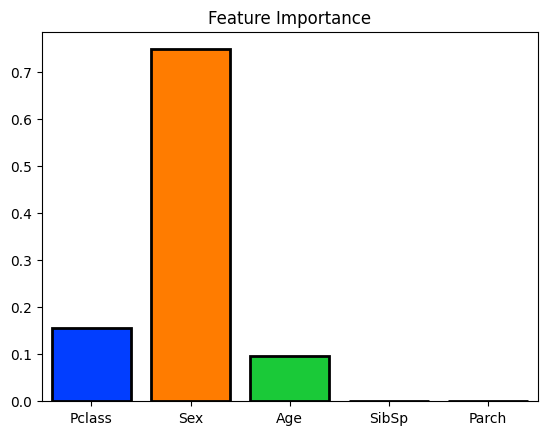

In [14]:
import seaborn as sns 

importances = tree.feature_importances_
columns = X.columns 

sns.barplot(x=columns, y=importances, palette='bright', saturation=2.0, edgecolor='black', linewidth=2)
plt.title('Feature Importance')
plt.show()